In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Neuron
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        """
        Initialize a Value object.
            :param 
                data: The numerical value.
                _children: A tuple of child Value objects that this Value depends on.
                _op: The operation that produced this Value (e.g., '+', '*').
                label: A label for this Value, useful for debugging.
        """ 
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    
    def __repr__(self):
        """
        String representation of the Value object.
        Returns a string that includes the data and label of the Value.
        """
        return f"Value(data={self.data}, label='{self.label}')"
    
    def __add__(self, other):
        """
        Add two Value objects.
        Returns a new Value object that represents the sum of the two.
        """
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        """
        Multiply two Value objects.
        Returns a new Value object that represents the product of the two.
        """
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [9]:
a = Value(2.0, label='a')
b = Value(3.0, label='b')
c = a + b
d = a * b
e = c * d

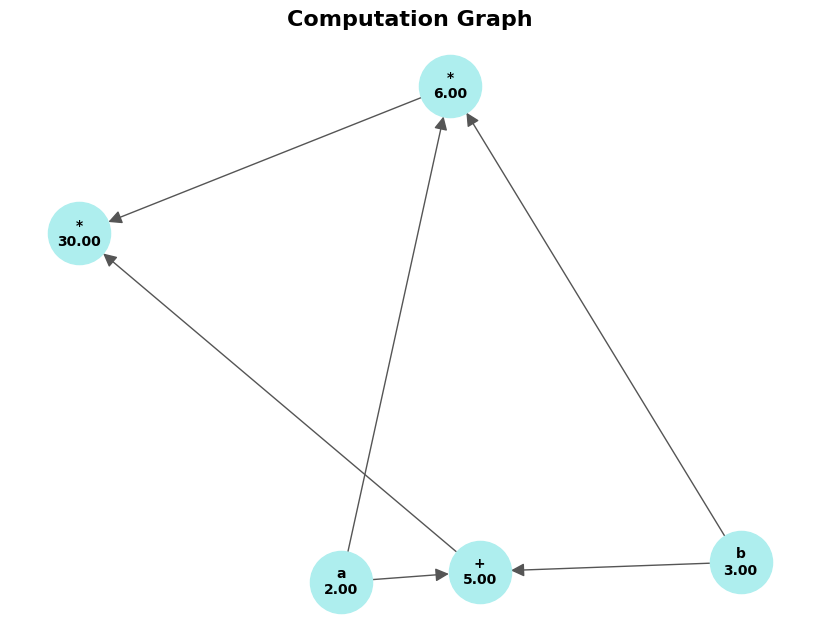

In [15]:
import networkx as nx

# Visualize the computation graph using networkx and matplotlib


def build_graph(value, graph=None, parent=None):
    if graph is None:
        graph = nx.DiGraph()
    node_label = f"{value.label or value._op or 'Value'}\n{value.data:.2f}"
    graph.add_node(id(value), label=node_label)
    if parent is not None:
        graph.add_edge(id(value), id(parent))
    for child in value._prev:
        build_graph(child, graph, value)
    return graph

def plot_graph(value):
    graph = build_graph(value)
    pos = nx.spring_layout(graph, seed=42)
    labels = nx.get_node_attributes(graph, 'label')
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=2000, node_color="#aeeeee", font_size=10, font_weight='bold', edge_color="#555555", arrowsize=20)
    plt.title("Computation Graph", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

plot_graph(e)